In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
%matplotlib inline

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10931045781961207114
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3155650150
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8766917024079764501
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
incidents = pd.read_csv("Data/Processed_incidents.csv")
incidents = incidents.loc[:, ~incidents.columns.str.contains('^Unnamed')]

In [3]:
incidents.Date= pd.to_datetime(incidents.Date)

In [4]:
incidents["Day"] = incidents.Date.dt.day
incidents["Month"] = incidents.Date.dt.month

In [5]:
incidents = incidents.drop(["Date"], axis=1)

In [6]:
incidents = incidents.drop(["IncidntNum", "Descript", "Address", "Resolution",
                             "Location", "Current Supervisor Districts",
                             "PdId", "Current Police Districts",
                             "Analysis Neighborhoods", "SF Find Neighborhoods"],
                           axis=1)

In [7]:
incidents.head(10)

,Category,DayOfWeek,Time,PdDistrict,X,Y,Day,Month
0,VEHICLE THEFT,Tuesday,10:30,SOUTHERN,-122.411912,37.775207,15,5
1,NON-CRIMINAL,Tuesday,04:14,SOUTHERN,-122.419258,37.775146,15,5
2,OTHER OFFENSES,Tuesday,02:01,MISSION,-122.417813,37.757101,15,5
3,OTHER OFFENSES,Tuesday,02:01,MISSION,-122.417813,37.757101,15,5
4,OTHER OFFENSES,Tuesday,02:01,MISSION,-122.417813,37.757101,15,5
5,OTHER OFFENSES,Tuesday,01:27,MISSION,-122.415617,37.756414,15,5
6,ROBBERY,Tuesday,01:25,SOUTHERN,-122.410042,37.781954,15,5
7,DRUG/NARCOTIC,Tuesday,01:25,SOUTHERN,-122.410042,37.781954,15,5
8,LIQUOR LAWS,Tuesday,00:19,PARK,-122.447761,37.769846,15,5
9,WARRANTS,Tuesday,00:19,PARK,-122.447761,37.769846,15,5


In [8]:
incidents.describe()

,X,Y,Day,Month
count,2.215024e+06,2.215024e+06,2.215024e+06,2.215024e+06
mean,-1.224229e+02,3.777076e+01,1.563884e+01,6.409041e+00
std,2.983459e-02,4.203596e-01,8.831914e+00,3.446165e+00
min,-1.225136e+02,3.770788e+01,1.000000e+00,1.000000e+00
25%,-1.224332e+02,3.775302e+01,8.000000e+00,3.000000e+00
50%,-1.224166e+02,3.777542e+01,1.600000e+01,6.000000e+00
75%,-1.224069e+02,3.778448e+01,2.300000e+01,9.000000e+00
max,-1.205000e+02,9.000000e+01,3.100000e+01,1.200000e+01


In [14]:
train, test = train_test_split(incidents, test_size = 0.2)

In [15]:
train_target = train.pop("Category")
test_target = test.pop("Category")

In [16]:
train_target_nodumm = train_target
test_target_nodumm = test_target
train_target = pd.get_dummies(train_target)
test_target = pd.get_dummies(test_target)

In [17]:
train = train.join(pd.get_dummies(train["DayOfWeek"]))
test = test.join(pd.get_dummies(test["DayOfWeek"]))
#train = train.join(pd.get_dummies(train["Resolution"]))
#test = test.join(pd.get_dummies(test["Resolution"]))
train = train.drop(["DayOfWeek"], axis = 1)
test = test.drop(["DayOfWeek"], axis = 1)


train['Time'] = [int(inc[:2])*60 + int(inc[3:]) for inc in train['Time']]

test['Time'] = [int(inc[:2])*60 + int(inc[3:]) for inc in test['Time']]

train = train.join(pd.get_dummies(train["PdDistrict"]))
test = test.join(pd.get_dummies(test["PdDistrict"]))
train = train.drop(["PdDistrict"], axis = 1)
test = test.drop(["PdDistrict"], axis = 1)

In [18]:
train.head(10)

,Time,X,Y,Day,Month,Friday,Monday,Saturday,Sunday,Thursday,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
143774,773,-122.418360,37.783150,14,5,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1936624,1119,-122.419658,37.764221,10,11,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2043289,1357,-122.415725,37.790731,23,2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
252745,1065,-122.419366,37.784028,1,9,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1555031,585,-122.402234,37.777496,10,8,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1705968,624,-122.383599,37.728010,2,7,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1141848,1380,-122.419360,37.761836,1,8,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1970840,1290,-122.471671,37.762850,15,8,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
417475,1065,-122.401658,37.771817,27,7,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1488849,1170,-122.466333,37.756503,29,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dropout, Dense, Reshape

Using TensorFlow backend.


In [20]:
import numpy as np
seed = 7
np.random.seed(seed)

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

keras.backend.clear_session()

model = Sequential()

# Input - Layer
model.add(Dense(100, activation = "softmax", input_shape=(22,)))
# Hidden - Layers
model.add(Dropout(0.2, noise_shape=None, seed=np.random.seed(seed)))
model.add(Dense(100, activation = "softmax"))
model.add(Dropout(0.2, noise_shape=None, seed=np.random.seed(seed)))
model.add(Dense(100, activation = "softmax"))
model.add(Dropout(0.2, noise_shape=None, seed=np.random.seed(seed)))
model.add(Dense(100, activation = "softmax"))

# Output- Layer
model.add(Dense(39, activation = "softmax"))
model.summary()

model.compile(
 optimizer = "adam",
 loss = "categorical_crossentropy",
 metrics = ["categorical_accuracy"]
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)  

In [21]:
result = model.fit(train, train_target, epochs=10, batch_size=64, validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 1417615 samples, validate on 354404 samples
Epoch 1/10
1417615/1417615 [==============================] - 87s 61us/step - loss: 2.6698 - categorical_accuracy: 0.2169 - val_loss: 2.6549 - val_categorical_accuracy: 0.2171
Epoch 2/10
1417615/1417615 [==============================] - 87s 61us/step - loss: 2.6515 - categorical_accuracy: 0.2169 - val_loss: 2.6550 - val_categorical_accuracy: 0.2171
Epoch 3/10
1417615/1417615 [==============================] - 87s 61us/step - loss: 2.6515 - categorical_accuracy: 0.2169 - val_loss: 2.6548 - val_categorical_accuracy: 0.2171
Epoch 4/10
1417615/1417615 [==============================] - 87s 61us/step - loss: 2.6515 - categorical_accuracy: 0.2169 - val_loss: 2.6548 - val_categorical_accuracy: 0.2171
Epoch 5/10
1417615/1417615 [==============================] - 88s 62us/step - loss: 2.6515 - categorical_accuracy: 0.2169 - val_loss: 2.6549 - val_categorical_accuracy: 0.2171
Epoch 6/10
1417615/

In [22]:
from sklearn.metrics import log_loss

logloss = log_loss(test_target, model.predict(test))
print(logloss)

2.6534160952698778


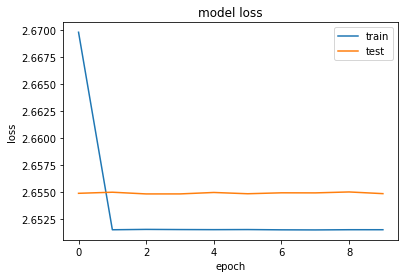

In [23]:
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()